# Fitting the (modified) Eales methods to REACT-1 data

This Jupyter notebook demonstrates the fitting of the (modified) Eales methods to REACT-1 data.

### Load the data

We start by loading the data. We use REACT-1 study round 14-to-9 for now.


In [1]:
library(tidyverse)
setwd("..")
START_ROUND = 14
END_ROUND = 19
df  = read.csv("data/reactdata.csv") %>%
    filter(round >= START_ROUND & round <= END_ROUND) %>%
    select(round, date, nSamples, nPos) %>%
    mutate(date=as.Date(date)) %>%
    arrange(date)
head(df)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,round,date,nSamples,nPos
,<int>,<date>,<int>,<int>
1,14,2021-09-09,1559,12
2,14,2021-09-10,2233,25
3,14,2021-09-11,2049,15
4,14,2021-09-12,2864,21
5,14,2021-09-13,6781,44
6,14,2021-09-14,7481,54


### Specify model options

We use default model options:

In [2]:
method = "overdispersed"
spline_degree = 3
target_dist_between_knots = 5
iter_warmup = 200
iter_sampling = 300
chains = 3
max_treedepth = 15
calculateRt = FALSE # If true, we would also need to specify tau_max, gentime_a, and gentime_b
init_fn = function() { list(sigma=0.1, rho=0.0002) } # Prevent issues with warmup

The remaining modelling decisions (such as prior distributions) are implied in the .stan file.

### Fitting the model

The ``runEalesMethod()`` function is a general function that can be used to fit any of the models. It performs the following actions:

1. Processes the input data into a format that Stan can accept
2. Loads the relevant Stan model
3. Fits the Stan model and extracts the results
4. Constructs the basis functions and calculates the prevalence and growth rate etc for each sample from the Stan output
5. Computes posterior predictive samples
6. Stores the mean and 95\% credible intervals of the quantities of interest

The function takes many arguments, as seen below.

In [3]:
source("OtherMethods/Eales/EalesMethod.R")
results = runEalesMethod(df,
                        method="overdispersed",
                        spline_degree=spline_degree,
                        target_dist_between_knots=target_dist_between_knots,
                        chains=chains,
                        iter_warmup=iter_warmup,
                        iter_sampling=iter_sampling,
                        max_treedepth = max_treedepth,
                        calculateRt=calculateRt,
                        init_fn = init_fn)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/nicsteyn/anaconda3/bin/cmdstan

- CmdStan version: 2.33.1


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable cmdstanr_no_ver_check=TRUE.


Attaching package: 'extraDistr'


The following object is masked from 'package:purrr':

    rdunif




[1] "Realised days per knot = 4.95121951219512"


Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: a_raw
 - chain 2: a_raw
 - chain 3: a_raw

To disable this message use options(cmdstanr_warn_inits = FALSE).




Running MCMC with 3 parallel chains...

Chain 1 Iteration:   1 / 500 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: beta_binomial_lpmf: First prior sample size parameter[1] is nan, but must be positive finite! (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/RtmpbswzuG/model-d3fc1e435e37.stan', line 94, column 2 to column 36)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: beta_binomial_lpmf: First prior sample size parameter[1] is nan, but must be positive finite! (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/RtmpbswzuG/model-d3fc1e435e37.stan', line 94, column 2 to column 36)

Chain 1 If this wa

Chain 2 Iteration:   1 / 500 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: beta_binomial_lpmf: Second prior sample size parameter[1] is 0, but must be positive finite! (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/RtmpbswzuG/model-d3fc1e435e37.stan', line 94, column 2 to column 36)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: beta_binomial_lpmf: Second prior sample size parameter[1] is 0, but must be positive finite! (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/RtmpbswzuG/model-d3fc1e435e37.stan', line 94, column 2 to column 36)

Chain 2 If this warn

Chain 3 Iteration:   1 / 500 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: beta_binomial_lpmf: Second prior sample size parameter[1] is 0, but must be positive finite! (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/RtmpbswzuG/model-d3fc1e435e37.stan', line 94, column 2 to column 36)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: beta_binomial_lpmf: Second prior sample size parameter[1] is 0, but must be positive finite! (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/RtmpbswzuG/model-d3fc1e435e37.stan', line 94, column 2 to column 36)

Chain 3 If this warn

Chain 1 Iteration: 100 / 500 [ 20%]  (Warmup) 
Chain 3 Iteration: 100 / 500 [ 20%]  (Warmup) 
Chain 2 Iteration: 100 / 500 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 500 [ 40%]  (Warmup) 
Chain 1 Iteration: 201 / 500 [ 40%]  (Sampling) 
Chain 3 Iteration: 200 / 500 [ 40%]  (Warmup) 
Chain 3 Iteration: 201 / 500 [ 40%]  (Sampling) 
Chain 2 Iteration: 200 / 500 [ 40%]  (Warmup) 
Chain 2 Iteration: 201 / 500 [ 40%]  (Sampling) 
Chain 1 Iteration: 300 / 500 [ 60%]  (Sampling) 
Chain 2 Iteration: 300 / 500 [ 60%]  (Sampling) 
Chain 3 Iteration: 300 / 500 [ 60%]  (Sampling) 
Chain 1 Iteration: 400 / 500 [ 80%]  (Sampling) 
Chain 2 Iteration: 400 / 500 [ 80%]  (Sampling) 
Chain 3 Iteration: 400 / 500 [ 80%]  (Sampling) 
Chain 1 Iteration: 500 / 500 [100%]  (Sampling) 
Chain 1 finished in 192.8 seconds.
Chain 2 Iteration: 500 / 500 [100%]  (Sampling) 
Chain 2 finished in 195.8 seconds.
Chain 3 Iteration: 500 / 500 [100%]  (Sampling) 
Chain 3 finished in 208.8 seconds.

All 3 chains finished su

See https://mc-stan.org/misc/warnings for details.


Warning message:
"Dropping 'draws_df' class as required metadata was removed."
Warning message:
"Dropping 'draws_df' class as required metadata was removed."


### Interpreting the results

The ``runEalesMethod()`` function returns two dataframes. The first is a dataframe of hidden state estimates:

In [4]:
states = results[[1]]
summary = results[[2]]

head(states)

,t,mean,lower,upper,variable,date
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,1,0.007712981,0.005749178,0.010218460,Pt,2021-09-09
2,2,0.007629342,0.005923634,0.009725038,Pt,2021-09-10
3,3,0.007558225,0.006085539,0.009271933,Pt,2021-09-11
4,4,0.007501850,0.006252399,0.008885119,Pt,2021-09-12
5,5,0.007462544,0.006334472,0.008605561,Pt,2021-09-13
6,6,0.007442705,0.006412782,0.008478596,Pt,2021-09-14


and the second is the full summary of the Stan model fit:

In [5]:
head(summary)

variable,mean,median,sd,lower,upper,rhat,ess_bulk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-7.326590e+04,-7.326580e+04,6.0954749,-73278.252500,-73254.547500,1.0134836,199.9799
a_raw[1],-4.762945e+00,-4.807445e+00,1.1794179,-7.039131,-2.190438,1.0114337,346.7822
a_raw[2],-4.781141e+00,-4.799940e+00,0.8589027,-6.478487,-2.914913,1.0135385,355.1812
a_raw[3],1.090740e-03,-8.637660e-03,0.9898681,-1.831455,1.929685,1.0147149,1746.4058
a_raw[4],-5.081080e-02,-6.086965e-02,0.9656494,-1.773000,1.764460,0.9994293,911.8095
a_raw[5],-7.319228e-02,-8.926730e-02,1.0115870,-2.004721,1.903329,1.0015072,637.5114


We extract fixed parameter estimates from the summary dataframe as: 

In [6]:
s = summary
cat(paste0("sigma = ", signif(s[s$variable=="sigma", "mean"], digits=2), " (", signif(s[s$variable=="sigma", "lower"], digits=2), ", ", signif(s[s$variable=="sigma", "upper"], digits=2), ")\n"))
cat(paste0("rho = ", 1e4*signif(s[s$variable=="rho", "mean"], digits=2), " (", 1e4*signif(s[s$variable=="rho", "lower"], digits=2), ", ", 1e4*signif(s[s$variable=="rho", "upper"], digits=2), ") x10^-4\n\n"))


sigma = 0.16 (0.1, 0.25)
rho = 1.9 (0.96, 3.2) x10^-4



and plot the growth rate estimates as:

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."


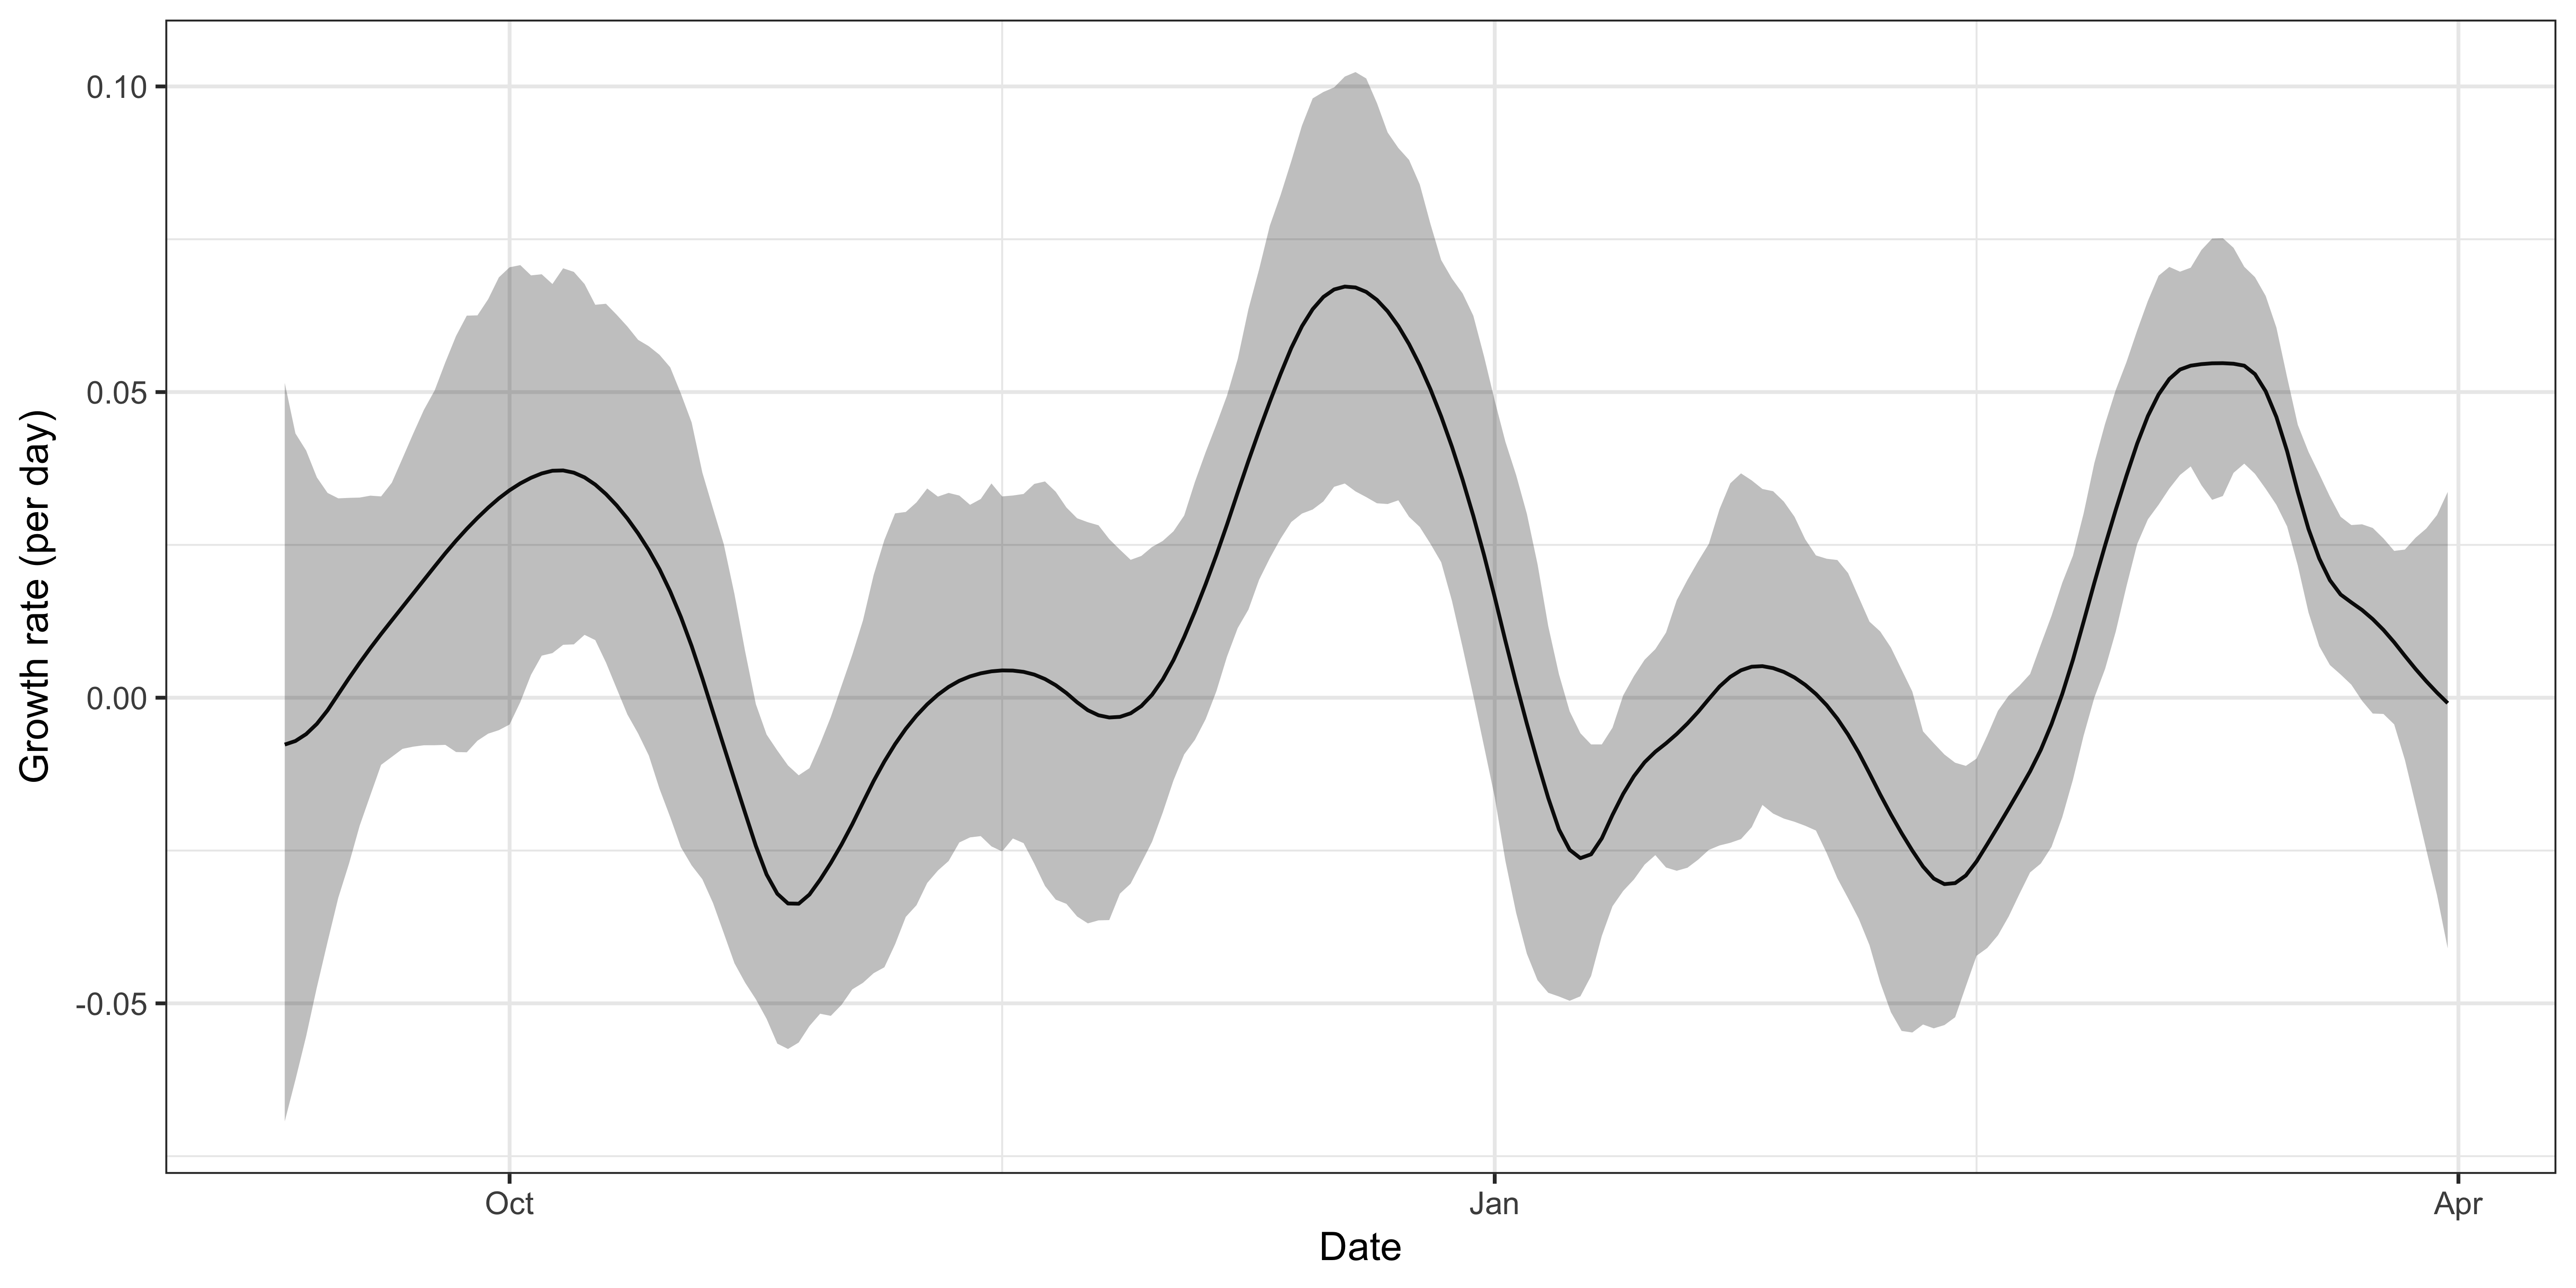

In [7]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 600)

plt = ggplot(states %>% filter(variable=="rt")) +
    geom_line(aes(x=date, y=mean)) +
    geom_ribbon(aes(x=date, ymin=lower, ymax=upper), alpha=0.3) +
    theme_bw() +
    xlab("Date") + ylab("Growth rate (per day)")

plt